In [2]:
import pandas as pd

In [4]:
spam = pd.read_csv('spam.csv')

In [5]:
spam.shape

(5572, 2)

Tokenizing

In [6]:
import nltk

In [7]:
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milks\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [8]:
# word_tokenize와 비슷하나 구두점을 별도로 분리하는 tokenizer
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']


In [9]:
#정규표현식으로 분리하는 tokenizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', '3', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'å', '1', '50', 'to', 'rcv']


In [10]:
## 특수문자 제거
import re
word = re.sub('[^a-zA-Z]', ' ', spam.iloc[5]['v2'])
words = word_tokenize(word)
print(words)         

['FreeMsg', 'Hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'I', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


In [11]:
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
words = [word for word in words if word not in english_stops]
print(words)  

['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\milks\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
print(words) # 표제어추출

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milks\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['FreeMsg', 'Hey', 'darling', 'week', 'word', 'back', 'I', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'rcv']


In [15]:
words = [word.lower() for word in words]
print(words)

['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'i', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


In [16]:
spam_token = []
for i in range(len(spam)):
    words = re.sub('[^a-zA-Z]', ' ', spam.iloc[i]['v2'])  # 특수문자 및 숫자 제거
    words = word_tokenize(words)  # tokenize
    words = [word for word in words if word not in english_stops]  # 불용어 제거
    words = [lemmatizer.lemmatize(word) for word in words]  # 표제어추출
    words = [word.lower() for word in words]  # 소문자 변환
    spam_token.append(words)

Embedding

In [26]:
from gensim.models import Word2Vec

CBOW = Word2Vec(spam_token, vector_size=2, window=2, min_count=1, workers=1, epochs=1000, sg=0)
CBOW_words = CBOW.wv.index_to_key
CBOW_vectors = CBOW.wv.vectors

In [27]:
CBOW_df = pd.DataFrame(CBOW_vectors, columns = ['x1', 'x2'])
CBOW_df['words'] = CBOW_words
CBOW_df = CBOW_df[['words', 'x1', 'x2']]
CBOW_df

,words,x1,x2
0,i,0.832977,1.427301
1,u,0.687059,0.570120
2,call,1.043573,-1.838064
3,get,0.715446,-0.425740
4,ur,0.760779,-0.964070
...,...,...,...
7300,burnt,1.116757,3.308822
7301,snap,1.205081,-1.613092
7302,quizclub,2.138157,-4.771756
7303,rwm,1.606327,-3.667447


In [34]:
CBOW.wv.most_similar('week', topn=5)

[('carlin', 1.0),
 ('pushbutton', 0.9999999403953552),
 ('mahaveer', 0.9999999403953552),
 ('choice', 0.9999999403953552),
 ('qlynnbv', 0.9999998807907104)]

In [35]:
CBOW.wv.most_similar('happy', topn=5)

[('spent', 1.0),
 ('fne', 1.0),
 ('dinero', 0.9999999403953552),
 ('spoiled', 0.9999998807907104),
 ('bunch', 0.9999997615814209)]

In [36]:
CBOW.wv.most_similar('customer', topn=5)

[('urgoin', 1.0),
 ('noworriesloans', 1.0),
 ('final', 1.0),
 ('inviting', 1.0),
 ('alto', 1.0)]

-  별로 성능이 안좋아보임

In [39]:
from gensim.models import FastText

Fastext = FastText(spam_token, vector_size=100, window=5, min_count=5, workers=4, sg=1)
Fastext_words = Fastext.wv.index_to_key
Fastext_vectors = Fastext.wv.vectors

In [42]:
Fastext.wv.most_similar('week', topn=5)

[('st', 0.979621410369873),
 ('freephone', 0.9786380529403687),
 ('txting', 0.9786030650138855),
 ('weekly', 0.9779753684997559),
 ('ringtone', 0.9748004674911499)]

In [43]:
Fastext.wv.most_similar('happy', topn=5)

[('happen', 0.9909581542015076),
 ('ha', 0.9897778034210205),
 ('have', 0.9894530773162842),
 ('hope', 0.9887070059776306),
 ('are', 0.9882273077964783)]

- fasttext가 더 유사한 단어를 잘 표현했다고 느낌

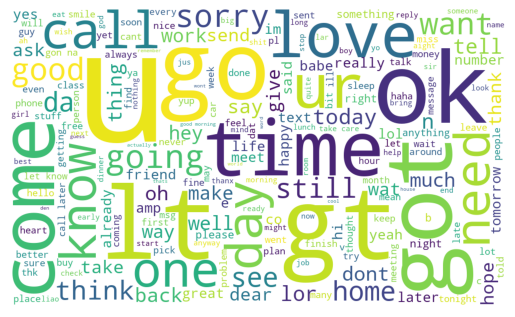

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ham_index = spam.loc[spam.v1=='ham',].index

ham_oneline = ""
for i in ham_index:
    for j in spam_token[i]:
        ham_oneline = ham_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(ham_oneline))
plt.axis("off")
plt.show()

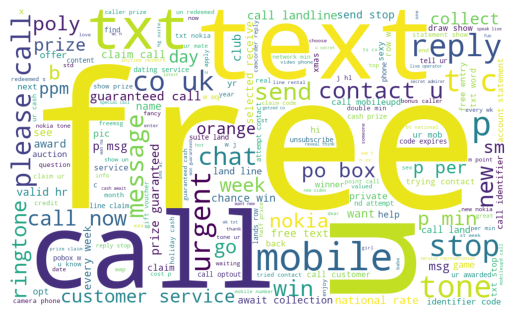

In [45]:
spam_index = spam.loc[spam.v1=='spam',].index

spam_oneline = ""
for i in spam_index:
    for j in spam_token[i]:
        spam_oneline = spam_oneline + j + " "

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate(spam_oneline))
plt.axis("off")
plt.show()

- 스팸 유무 데이터 간의 단어들의 빈도수가 다름